<a href="https://colab.research.google.com/github/mesieeeee/forest_fire/blob/main/forest_fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d phylake1337/fire-dataset

100% 386M/387M [00:20<00:00, 22.0MB/s]
100% 387M/387M [00:20<00:00, 20.3MB/s]


In [4]:
from zipfile import ZipFile
dataset = '/content/fire-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [5]:
!ls

fire_dataset  fire-dataset.zip	kaggle.json  sample_data


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split


In [7]:
fire_images = os.listdir('/content/fire_dataset/fire_images')
print(fire_images[0:5])


['fire.386.png', 'fire.692.png', 'fire.426.png', 'fire.721.png', 'fire.553.png']


In [8]:
non_fire_images = os.listdir('/content/fire_dataset/non_fire_images')
print(non_fire_images[0:5])

['non_fire.239.png', 'non_fire.204.png', 'non_fire.62.png', 'non_fire.111.png', 'non_fire.227.png']


In [9]:
print('number of files with fire images', len(fire_images))
print('number of files in non fire images', len(non_fire_images))

number of files with fire images 755
number of files in non fire images 244


In [10]:
fire_labels = [1]*755
non_fire_labels = [0]*244

In [11]:
print(fire_labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [12]:
print(non_fire_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [13]:
labels = fire_labels + non_fire_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])


999
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


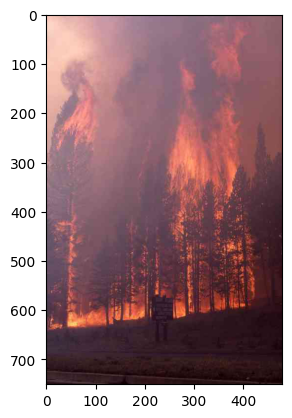

In [14]:
img = Image.open('/content/fire_dataset/fire_images/fire.695.png')
imgplot = plt.imshow(img)



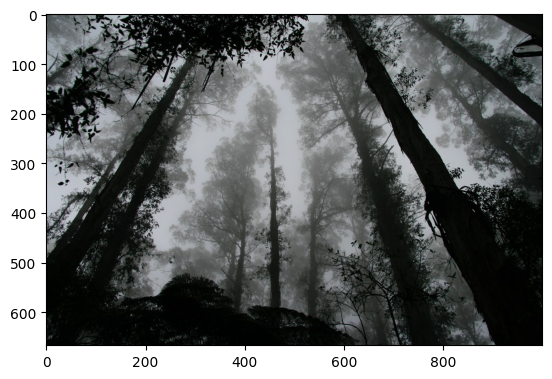

In [15]:
img = Image.open('/content/fire_dataset/non_fire_images/non_fire.18.png')
imgplot = plt.imshow(img)

In [16]:
fire_images_path = '/content/fire_dataset/fire_images/'

data = []

for img_file in fire_images:
  image = Image.open(fire_images_path + img_file)
  image = image.resize((128, 128))
  image = image.convert('RGB')
  image = np.array(image)


  data.append(image)

In [17]:
non_fire_images_path = '/content/fire_dataset/non_fire_images/'

for img_file in non_fire_images:
  image = Image.open(non_fire_images_path + img_file)
  image = image.resize((128, 128))
  image = image.convert('RGB')
  image = np.array(image)

  data.append(image)




In [18]:
len(data)

999

In [19]:
type(data)

list

In [20]:
data[0]

array([[[  8,  24,  34],
        [ 11,  31,  47],
        [ 17,  48,  74],
        ...,
        [  2,  68, 127],
        [  3,  63, 119],
        [  4,  50,  94]],

       [[  6,  13,  17],
        [  6,   9,  13],
        [ 13,  32,  49],
        ...,
        [  2,  70, 130],
        [  2,  62, 116],
        [  7,  47,  90]],

       [[  6,  11,  17],
        [  3,   8,  14],
        [ 13,  28,  42],
        ...,
        [  1,  74, 134],
        [  4,  53, 100],
        [  6,  30,  60]],

       ...,

       [[  3,   8,   4],
        [  5,   7,   5],
        [  6,   6,   7],
        ...,
        [  5,   1,   1],
        [  8,   2,   2],
        [ 27,   7,   3]],

       [[  3,   5,   3],
        [  4,   6,   5],
        [  3,   5,   6],
        ...,
        [  5,   2,   1],
        [  8,   2,   2],
        [ 27,   9,   3]],

       [[  3,   5,   4],
        [  3,   5,   6],
        [  3,   5,   6],
        ...,
        [  3,   2,   1],
        [  4,   1,   2],
        [ 21,   7,   3]]

In [21]:
data[1]

array([[[  0,   1,   2],
        [  0,   0,   2],
        [  0,   0,   2],
        ...,
        [ 17,   1,   1],
        [ 34,   1,   1],
        [ 44,   0,   0]],

       [[  0,   1,   3],
        [  0,   0,   2],
        [  0,   0,   2],
        ...,
        [ 15,   0,   0],
        [ 36,   1,   2],
        [ 49,   3,   3]],

       [[  0,   1,   3],
        [  0,   0,   2],
        [  1,   0,   3],
        ...,
        [ 14,   0,   2],
        [ 37,   2,   3],
        [ 54,   4,   6]],

       ...,

       [[ 98,  34,  11],
        [139,  56,  14],
        [200, 105,   9],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  1,   1,   1]],

       [[ 69,  14,  16],
        [109,  31,  14],
        [187,  88,  14],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 56,  10,   8],
        [115,  42,  13],
        [195,  97,  16],
        ...,
        [  2,   2,   2],
        [  2,   2,   2],
        [  2,   2,   2]]

In [22]:
type(data[0])

numpy.ndarray

In [23]:
data[0].shape

(128, 128, 3)

In [24]:
labels[0]

1

In [25]:
X = np.array(data)
Y = np.array(labels)


In [26]:
type(X)

numpy.ndarray

In [27]:
type(Y)

numpy.ndarray

In [28]:
print(X.shape)

(999, 128, 128, 3)


In [29]:
print(Y.shape)

(999,)


In [30]:
print(Y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 2)
print(X_train, Y_train)

[[[[ 27  42  37]
   [ 35  44  39]
   [ 84  74  61]
   ...
   [193 190 165]
   [194 192 167]
   [193 191 166]]

  [[ 27  41  37]
   [ 34  42  37]
   [ 81  73  61]
   ...
   [193 190 165]
   [194 191 166]
   [193 190 165]]

  [[ 18  32  28]
   [ 43  50  43]
   [ 77  73  62]
   ...
   [193 189 163]
   [195 191 164]
   [193 189 163]]

  ...

  [[119 109  73]
   [104  96  71]
   [ 82  79  50]
   ...
   [  3   8   7]
   [  4  13   9]
   [ 34  56  43]]

  [[120 113  75]
   [109 101  69]
   [117 110  74]
   ...
   [  6  11  10]
   [  5  13   9]
   [ 37  58  47]]

  [[107 105  66]
   [113 106  69]
   [122 110  70]
   ...
   [  9  10  10]
   [  4   5   4]
   [  4  12   7]]]


 [[[239 242 249]
   [238 242 248]
   [239 244 248]
   ...
   [251 253 252]
   [253 254 254]
   [253 253 253]]

  [[234 240 246]
   [234 239 247]
   [236 241 246]
   ...
   [253 254 253]
   [253 254 254]
   [253 253 253]]

  [[231 238 246]
   [235 240 246]
   [236 240 247]
   ...
   [253 253 253]
   [253 253 253]
   [253 253

In [32]:
print(X_test, Y_test)

[[[[212 164 101]
   [211 163 101]
   [211 163 101]
   ...
   [194 162 129]
   [194 164 131]
   [194 165 130]]

  [[211 165 102]
   [211 164 100]
   [211 165 100]
   ...
   [196 164 126]
   [197 166 127]
   [196 165 129]]

  [[212 166 103]
   [210 165  99]
   [211 165 102]
   ...
   [197 165 128]
   [196 166 132]
   [198 168 132]]

  ...

  [[ 32  18  13]
   [ 33  18  13]
   [ 40  20  16]
   ...
   [ 67  36  19]
   [ 39  22  14]
   [ 48  28  14]]

  [[ 29  21  13]
   [ 30  21  13]
   [ 30  19  14]
   ...
   [ 46  24  19]
   [ 42  25  17]
   [ 42  21  13]]

  [[ 25  18  12]
   [ 21  15   8]
   [ 15  10   8]
   ...
   [ 49  27  16]
   [ 50  27  16]
   [ 42  22  12]]]


 [[[ 96  96  88]
   [ 97  97  89]
   [101  96  90]
   ...
   [108  99  94]
   [108  99  94]
   [107  98  93]]

  [[ 98  95  88]
   [ 99  96  89]
   [101  96  90]
   ...
   [106  97  92]
   [106  97  92]
   [105  96  91]]

  [[ 99  94  88]
   [100  95  89]
   [101  96  90]
   ...
   [106  97  92]
   [106  97  92]
   [105  96

In [33]:
X_train[0]

array([[[ 27,  42,  37],
        [ 35,  44,  39],
        [ 84,  74,  61],
        ...,
        [193, 190, 165],
        [194, 192, 167],
        [193, 191, 166]],

       [[ 27,  41,  37],
        [ 34,  42,  37],
        [ 81,  73,  61],
        ...,
        [193, 190, 165],
        [194, 191, 166],
        [193, 190, 165]],

       [[ 18,  32,  28],
        [ 43,  50,  43],
        [ 77,  73,  62],
        ...,
        [193, 189, 163],
        [195, 191, 164],
        [193, 189, 163]],

       ...,

       [[119, 109,  73],
        [104,  96,  71],
        [ 82,  79,  50],
        ...,
        [  3,   8,   7],
        [  4,  13,   9],
        [ 34,  56,  43]],

       [[120, 113,  75],
        [109, 101,  69],
        [117, 110,  74],
        ...,
        [  6,  11,  10],
        [  5,  13,   9],
        [ 37,  58,  47]],

       [[107, 105,  66],
        [113, 106,  69],
        [122, 110,  70],
        ...,
        [  9,  10,  10],
        [  4,   5,   4],
        [  4,  12,   7]]

In [34]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#scaler = StandardScaler()
#model = scaler.fit(data)
#scaled_data = model.transform(data)

In [35]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255


In [36]:
print(X_train_scaled)

[[[[0.10588235 0.16470588 0.14509804]
   [0.1372549  0.17254902 0.15294118]
   [0.32941176 0.29019608 0.23921569]
   ...
   [0.75686275 0.74509804 0.64705882]
   [0.76078431 0.75294118 0.65490196]
   [0.75686275 0.74901961 0.65098039]]

  [[0.10588235 0.16078431 0.14509804]
   [0.13333333 0.16470588 0.14509804]
   [0.31764706 0.28627451 0.23921569]
   ...
   [0.75686275 0.74509804 0.64705882]
   [0.76078431 0.74901961 0.65098039]
   [0.75686275 0.74509804 0.64705882]]

  [[0.07058824 0.1254902  0.10980392]
   [0.16862745 0.19607843 0.16862745]
   [0.30196078 0.28627451 0.24313725]
   ...
   [0.75686275 0.74117647 0.63921569]
   [0.76470588 0.74901961 0.64313725]
   [0.75686275 0.74117647 0.63921569]]

  ...

  [[0.46666667 0.42745098 0.28627451]
   [0.40784314 0.37647059 0.27843137]
   [0.32156863 0.30980392 0.19607843]
   ...
   [0.01176471 0.03137255 0.02745098]
   [0.01568627 0.05098039 0.03529412]
   [0.13333333 0.21960784 0.16862745]]

  [[0.47058824 0.44313725 0.29411765]
   [0.4

In [37]:
print(X_test_scaled)

[[[[0.83137255 0.64313725 0.39607843]
   [0.82745098 0.63921569 0.39607843]
   [0.82745098 0.63921569 0.39607843]
   ...
   [0.76078431 0.63529412 0.50588235]
   [0.76078431 0.64313725 0.51372549]
   [0.76078431 0.64705882 0.50980392]]

  [[0.82745098 0.64705882 0.4       ]
   [0.82745098 0.64313725 0.39215686]
   [0.82745098 0.64705882 0.39215686]
   ...
   [0.76862745 0.64313725 0.49411765]
   [0.77254902 0.65098039 0.49803922]
   [0.76862745 0.64705882 0.50588235]]

  [[0.83137255 0.65098039 0.40392157]
   [0.82352941 0.64705882 0.38823529]
   [0.82745098 0.64705882 0.4       ]
   ...
   [0.77254902 0.64705882 0.50196078]
   [0.76862745 0.65098039 0.51764706]
   [0.77647059 0.65882353 0.51764706]]

  ...

  [[0.1254902  0.07058824 0.05098039]
   [0.12941176 0.07058824 0.05098039]
   [0.15686275 0.07843137 0.0627451 ]
   ...
   [0.2627451  0.14117647 0.0745098 ]
   [0.15294118 0.08627451 0.05490196]
   [0.18823529 0.10980392 0.05490196]]

  [[0.11372549 0.08235294 0.05098039]
   [0.1

In [38]:
import tensorflow as tf
from tensorflow import keras

In [39]:
num_of_classes = 2
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [40]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [48]:
history = model.fit(X_train_scaled, Y_train, validation_split = 0.2, epochs=20)

Epoch 1/20
20/20 [==============================] - 1s 26ms/step - loss: 0.1045 - acc: 0.9671 - val_loss: 0.0661 - val_acc: 0.9812
Epoch 2/20
20/20 [==============================] - 0s 21ms/step - loss: 0.0793 - acc: 0.9781 - val_loss: 0.0708 - val_acc: 0.9750
Epoch 3/20
20/20 [==============================] - 0s 20ms/step - loss: 0.0672 - acc: 0.9781 - val_loss: 0.0739 - val_acc: 0.9688
Epoch 4/20
20/20 [==============================] - 0s 21ms/step - loss: 0.0397 - acc: 0.9844 - val_loss: 0.0585 - val_acc: 0.9812
Epoch 5/20
20/20 [==============================] - 0s 18ms/step - loss: 0.0308 - acc: 0.9922 - val_loss: 0.0636 - val_acc: 0.9688
Epoch 6/20
20/20 [==============================] - 0s 19ms/step - loss: 0.0165 - acc: 0.9969 - val_loss: 0.0973 - val_acc: 0.9438
Epoch 7/20
20/20 [==============================] - 0s 18ms/step - loss: 0.0215 - acc: 0.9953 - val_loss: 0.0686 - val_acc: 0.9688
Epoch 8/20
20/20 [==============================] - 0s 19ms/step - loss: 0.0120 - a

In [49]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy=', accuracy)

7/7 [==============================] - 0s 7ms/step - loss: 0.1608 - acc: 0.9650
Test Accuracy= 0.9649999737739563


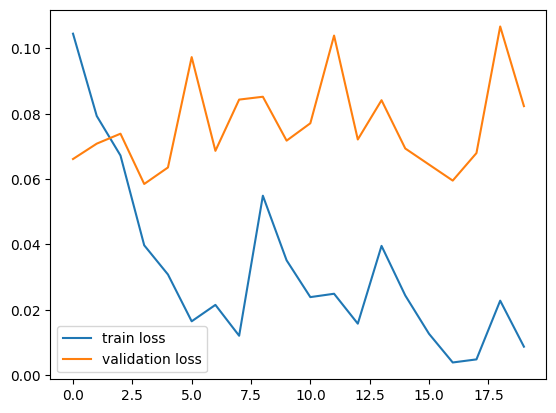

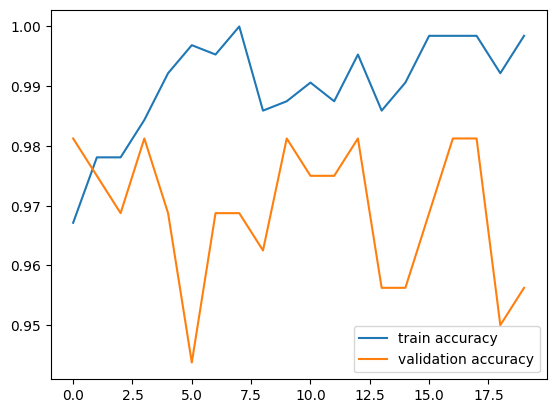

In [50]:
h = history

plt.plot(h.history['loss'], label = 'train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'], label = 'train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()


Path of the image to be predicted: /content/forest burn.jpeg


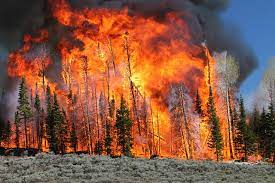

1/1 [==============================] - 0s 20ms/step
[[0.15353228 0.3041061 ]]
1
the forest is burning


In [55]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image, (128, 128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128, 128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label == 1:
  print("the forest is burning")
else:
  print("the forest is not burning")

